In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 6.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.8 MB/s 
     |████████████████████████████████| 15.4 MB 35.9 MB/s 


In [2]:
pip install contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily 
import xyzservices.providers as xyz
import matplotlib.pyplot as plt

In [4]:
from shapely.geometry import LineString
from shapely.geometry import Point
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [5]:
Province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/ProvCM01012021_g")
Province 

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [6]:
Corsi_Acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Corsi_Acqua/Corsi_acqua_Piano_di_Gestione.zip")
Corsi_Acqua 

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
2        215  ...  MULTILINESTRING ((536963.747 5005395.412, 5369...
3        252  ...  LINESTRING (509280.513 5047845.024, 509281.795...
4        255  ...  LINESTRING (528977.056 5024109.798, 528981.181...
5        256  ...  MULTILINESTRING ((530299.337 5029522.740, 5302...
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
9         67  ...  MULTILINESTRING ((477477.600 5043097.081, 4774...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
11        89  ...  LINESTRING (508090.899 5042218.610, 508089.941...
12        91  ...  MULTILINESTRING ((496168.003 5046279.338, 4961...
13        93  ...  MULTILINESTRING ((525857.172 5023446.332, 5258...
14       111  ...  MULTILINESTRING ((508837.773 5045937.205, 5088...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
16       113  ...  LINESTRING (518545.443 5029547.737, 518544.379...
17       114  ...  MULTILINESTRING ((521208.084 5044838.623, 5212...
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
19       169  ...  MULTILINESTRING ((532925.930 5047367.573, 5329...
20       170  ...  LINESTRING (534665.365 5048814.505, 534665.277...
21       311  ...  MULTILINESTRING ((541065.056 5043895.637, 5410...
22       323  ...  MULTILINESTRING ((540405.663 5051150.915, 5404...
23       332  ...  MULTILINESTRING ((514309.053 5017285.313, 5143...
24       355  ...  MULTILINESTRING ((485612.702 5049364.485, 4856...
25       356  ...  MULTILINESTRING ((502646.142 5047823.543, 5026...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
27       358  ...  LINESTRING (504109.620 5040607.275, 504113.432...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
29       457  ...  LINESTRING (506881.191 5048869.732, 506884.401...
30       498  ...  MULTILINESTRING ((495633.621 5016541.175, 4956...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
33       428  ...  MULTILINESTRING ((507915.612 5019743.337, 5079...
34       562  ...  MULTILINESTRING ((508504.554 5051917.198, 5085...
35       565  ...  LINESTRING (541818.985 5047325.989, 541818.901...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
37       597  ...  LINESTRING (533523.584 5047140.053, 533523.459...
38       601  ...  MULTILINESTRING ((478094.145 5046036.944, 4780...
39       619  ...  LINESTRING (513185.093 5030112.328, 513188.599...
40       637  ...  MULTILINESTRING ((529703.516 5045101.098, 5297...
41       653  ...  MULTILINESTRING ((507313.752 5043557.731, 5073...
42       655  ...  MULTILINESTRING ((497412.956 5052989.684, 4974...
43       656  ...  MULTILINESTRING ((515431.664 5025817.802, 5154...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[45 rows x 31 columns]

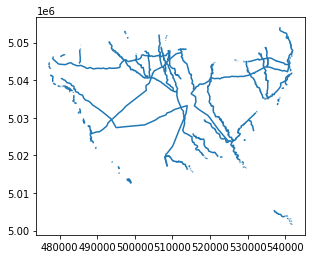

In [7]:
Corsi_Acqua.plot()

In [8]:
Milano = Province[Province["DEN_UTS"] == "Milano"]
Milano

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

In [9]:
ax = Corsi_Acqua.to_crs(epsg=3857).plot(figsize=(20,20), linewidth=4, facecolor= "none", edgecolor = "Blue")
contextily.add_basemap(ax)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
Corsi_milano = Corsi_Acqua[Corsi_Acqua.within(Milano.geometry.squeeze())]
Top10_CorsiAcqua_Milano = Corsi_milano.nlargest(10, "SHAPE_LEN")
Top10_CorsiAcqua_Milano

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
35       565  ...  LINESTRING (541818.985 5047325.989, 541818.901...
3        252  ...  LINESTRING (509280.513 5047845.024, 509281.795...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...
27       358  ...  LINESTRING (504109.620 5040607.275, 504113.432...
33       428  ...  MULTILINESTRING ((507915.612 5019743.337, 5079...

[10 rows x 31 columns]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:82: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if is_color_like(value):


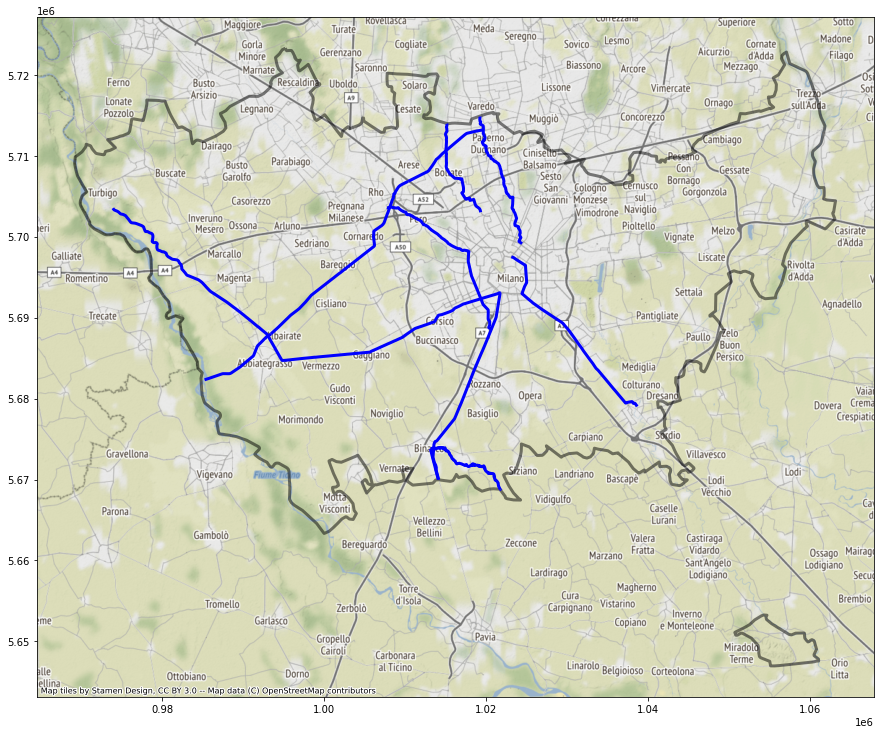

In [11]:
ax = Top10_CorsiAcqua_Milano.to_crs(epsg=3857).plot(figsize= (15, 15), edgecolor="B", linewidth=3)
Milano.to_crs(epsg=3857).plot(ax=ax, facecolor="none", alpha = 0.5, linewidth= 3, edgecolor= "Black")
contextily.add_basemap(ax=ax)

#2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [12]:
Navigli = Corsi_milano[Corsi_milano["NOME"].str.contains("Naviglio")]
Navigli 

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...

[2 rows x 31 columns]

In [13]:
Navigli_Fiume_Origine = Corsi_milano[Corsi_milano["BACINO"].str.contains("TICINO")]
Navigli_Fiume_Origine

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[4 rows x 31 columns]

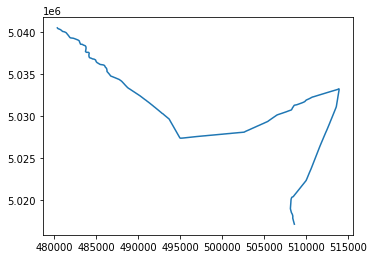

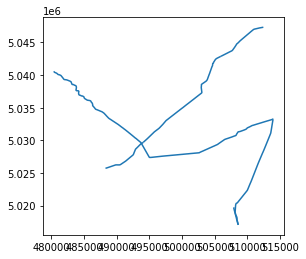

In [14]:
Navigli.plot()
Navigli_Fiume_Origine.plot()

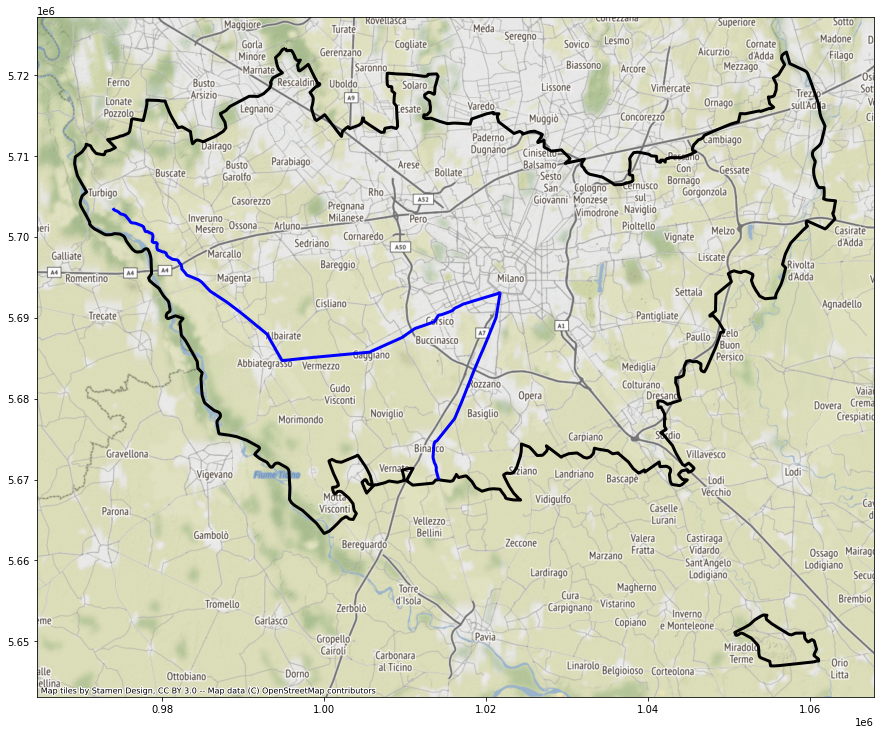

In [15]:
ax = Milano.to_crs(epsg=3857).plot(figsize= (15, 15), edgecolor="Black",Facecolor="none", linewidth=3)
Navigli.to_crs(epsg=3857).plot(ax=ax, facecolor="none", alpha = 1, linewidth= 3, edgecolor= "Blue")
contextily.add_basemap(ax=ax)

In [16]:
Navigli = Corsi_Acqua[Corsi_Acqua["NOME"].str.contains("Navigli")]
Navigli_Origine = Corsi_Acqua[Corsi_Acqua.intersects(Navigli.geometry.squeeze().unary_union)]
Navigli_Origine = Navigli_Origine[~Navigli_Origine["NOME"].str.contains("Navigli")]

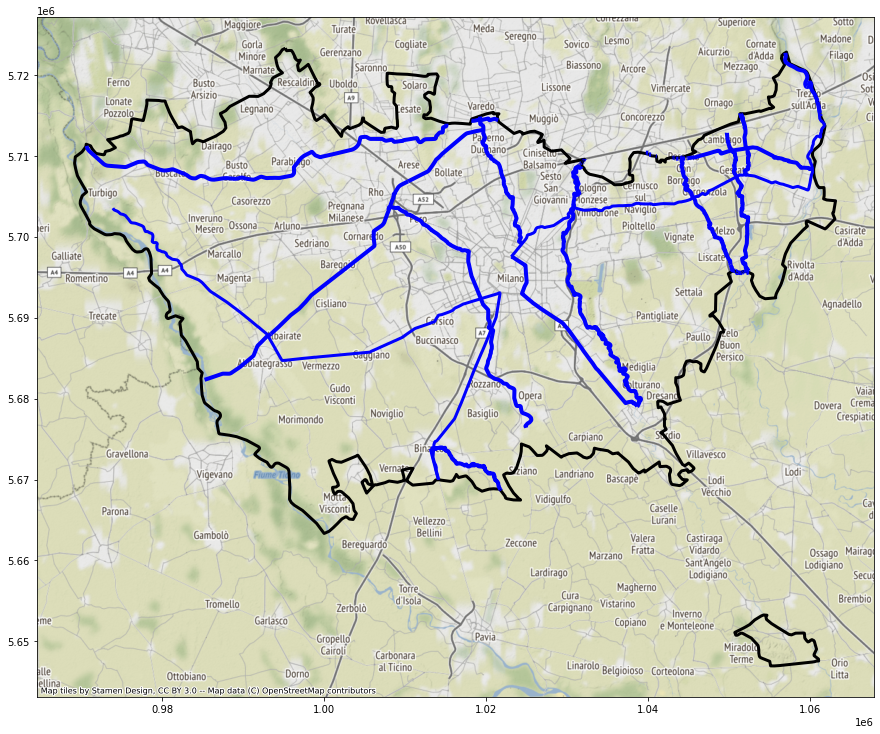

In [17]:
ax = Milano.to_crs(epsg=3857).plot(figsize= (15, 15), edgecolor="Black",Facecolor="none", linewidth=3)
Navigli.to_crs(epsg=3857).plot(ax=ax, facecolor="none", alpha = 1, linewidth= 3, edgecolor= "Blue")
Navigli_Origine.to_crs(epsg=3857).plot(ax=ax, linewidth= 4, edgecolor= "Blue")
contextily.add_basemap(ax=ax)

#3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [18]:
Comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/GEOPANDAS/Regioni/Limiti01012021_g/Com01012021_g")
Comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

Monza
i parchi all'interno del comune sono: 
 Series([], Name: NOME, dtype: object)


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


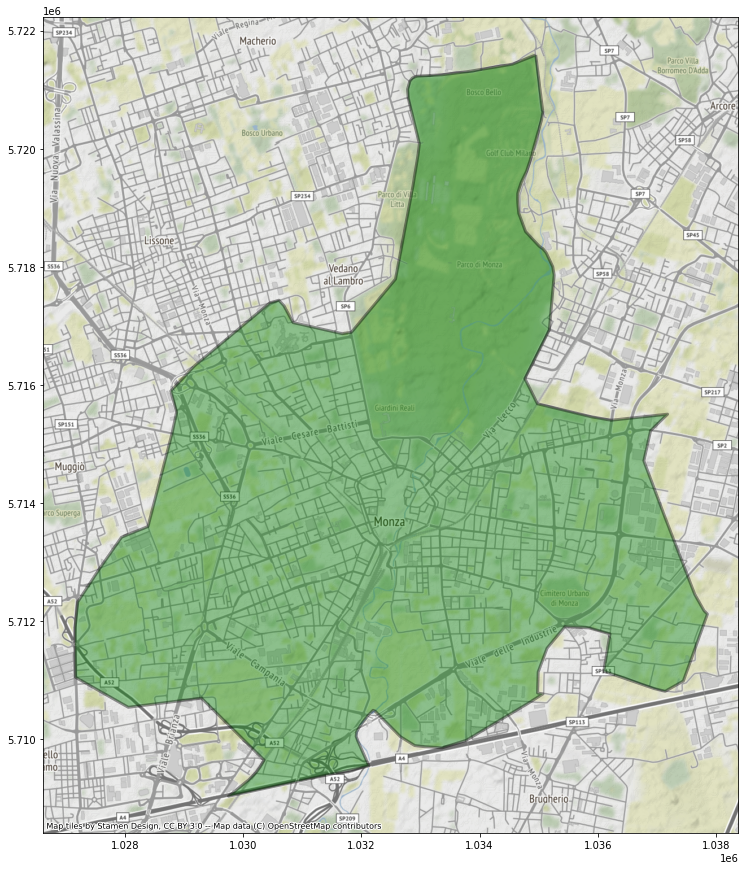

In [21]:
input_Comune = input()
ControlloComune = Comuni[Comuni["COMUNE"] == input_Comune]
Fiume_Utente = Corsi_Acqua[Corsi_Acqua.intersects(ControlloComune.geometry.squeeze())]

print("i parchi all'interno del comune sono: \n", Fiume_Utente.NOME)

ax = ControlloComune.to_crs(epsg=3857).plot(figsize= (15, 15), edgecolor="Black",Facecolor="green", linewidth=3, alpha=0.4)
Fiume_Utente.to_crs(epsg = 3857).plot(ax = ax ,linewidth=4, edgecolor = "b" )
contextily.add_basemap(ax=ax)



Inserire il nome di un fiume: Ticino


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


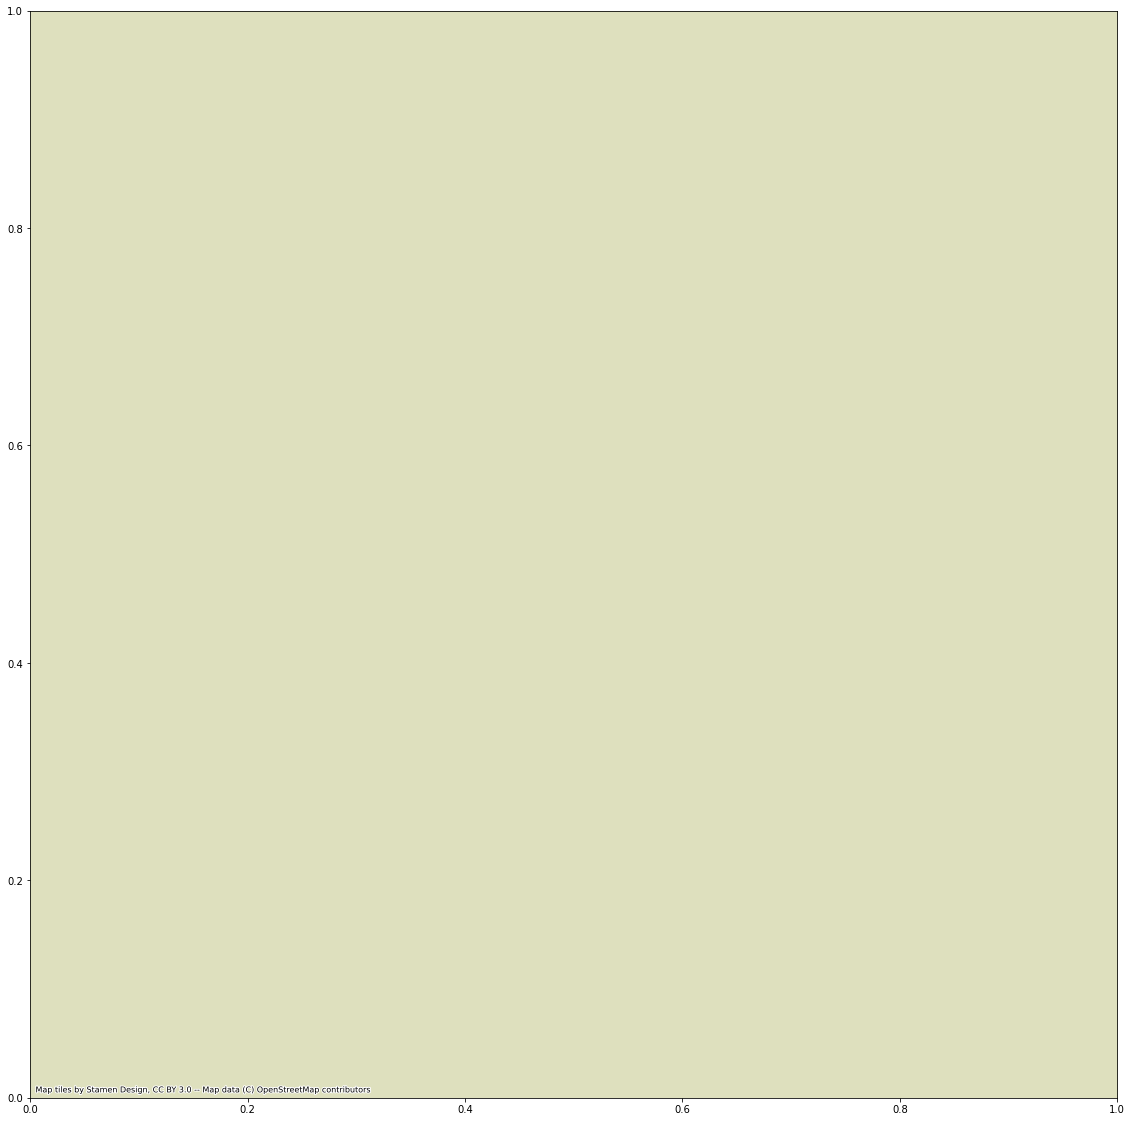

In [22]:
input_Fiume = input("Inserire il nome di un fiume: ")
fiume = Corsi_Acqua[Corsi_Acqua["NOME"] == input_Fiume]
squeezeFiume = fiume.geometry.geometry.squeeze()

Comuni_Fiume = Comuni[Comuni.intersects(squeezeFiume)]
Comuni_Fiume

ax = fiume.to_crs(epsg = 3857).plot(figsize=(20,20), edgecolor = "b", linewidth = 4)
Comuni_Fiume.to_crs(epsg = 3857).plot(ax = ax, facecolor = "g", alpha = 0.2 ,linewidth=4, edgecolor = "k" )
contextily.add_basemap(ax=ax)

In [40]:
Corsi_Acqua_Milano = Corsi_Acqua[Corsi_Acqua.within(Milano.geometry.squeeze())]
lenghtCorsi_Acqua_Milano = Corsi_Acqua.length

print("I corsi d'acqua di Milano sono:",len(lenghtCorsi_Acqua_Milano))
print(lenghtCorsi_Acqua_Milano)

ax = Milano.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "g", alpha= 0.2, edgecolor = "k", linewidth = 4)
Corsi_Acqua.to_crs(epsg = 3857).plot(ax = ax,linewidth=4, edgecolor = "b" )
contextily.add_basemap(ax=ax)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
Comuni_Mil = Comuni[Comuni.within(Milano.geometry.squeeze())]
comuniNotCrossed = Comuni_Mil[~Comuni_Mil.intersects(Corsi_Acqua.geometry.squeeze().unary_union)]

In [25]:
Copia_Comuni_SenzaParchi = comuniNotCrossed.copy()
Copia_Comuni_SenzaParchi

COD_RIP  ...                                           geometry
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1819        1  ...  POLYGON ((512570.857 5023729.693, 513089.378 5...
1827        1  ...  POLYGON ((500509.971 5020089.716, 501083.530 5...
1828        1  ...  POLYGON ((509908.110 5030714.300, 510291.086 5...
1832        1  ...  POLYGON ((502258.270 5020062.715, 502348.646 5...
1838        1  ...  POLYGON ((493645.896 5042755.547, 493828.896 5...
1845        1  ...  POLYGON ((495741.812 5050658.000, 495673.882 5...
1846        1  ...  POLYGON ((506991.974 5033297.204, 507033.799 5...
1848        1  ...  POLYGON ((516890.340 5047212.224, 517410.573 5...
1857        1  ...  POLYGON ((502905.966 5034740.413, 503349.392 5...
1859        1  ...  POLYGON ((490251.922 5047124.515, 490453.921 5...
1865        1  ...  POLYGON ((538550.566 5049619.494, 538992.562 5...
1866        1  ...  POLYGON ((500531.346 5027446.661, 500758.314 5...
1867        1  ...  POLYGON ((488591.934 5042016.553, 489169.931 5...
1872        1  ...  POLYGON ((530637.311 5037674.084, 530718.497 5...
1876        1  ...  POLYGON ((491165.072 5038978.576, 491256.353 5...
1881        1  ...  POLYGON ((487895.939 5039115.574, 487939.940 5...
1888        1  ...  POLYGON ((505350.373 5026481.169, 505471.341 5...
1890        1  ...  POLYGON ((492900.903 5040340.566, 493342.899 5...
1891        1  ...  POLYGON ((495406.885 5025257.676, 495661.881 5...
1893        1  ...  POLYGON ((528193.266 5033347.616, 528901.135 5...
1900        1  ...  POLYGON ((526031.199 5040030.273, 525922.217 5...
1902        1  ...  POLYGON ((539779.557 5048217.505, 540042.555 5...
1909        1  ...  POLYGON ((527187.149 5038545.078, 527520.147 5...
1910        1  ...  POLYGON ((502923.673 5023416.192, 502924.672 5...
1914        1  ...  POLYGON ((493287.057 5047438.315, 493842.650 5...
1916        1  ...  POLYGON ((493642.898 5038431.580, 493847.895 5...
1919        1  ...  POLYGON ((499076.513 5038929.576, 499122.513 5...
1920        1  ...  POLYGON ((523352.676 5039565.571, 523621.892 5...
1926        1  ...  POLYGON ((537392.574 5048998.500, 537416.574 5...
1934        1  ...  POLYGON ((502708.110 5021027.210, 503585.323 5...
1935        1  ...  POLYGON ((529529.257 5040000.567, 529849.941 5...
1937        1  ...  POLYGON ((496408.251 5038462.078, 496834.523 5...
1940        1  ...  POLYGON ((490864.917 5047319.512, 491416.914 5...

[34 rows x 13 columns]

In [27]:
comuniNotCrossedCopy = Copia_Comuni_SenzaParchi.to_crs(epsg=3857)
comuniNotCrossedCopy.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
comuniNotCrossedCopy["coords"] = comuniNotCrossedCopy["geometry"].apply(lambda x: x.representative_point().coords[:])
comuniNotCrossedCopy.head(5)

COD_RIP  ...                                     coords
1815        1  ...  [(996241.2894144668, 5701664.3077902775)]
1819        1  ...  [(1020010.0333690869, 5677131.354512434)]
1827        1  ...  [(1002398.0010930721, 5673687.012591755)]
1828        1  ...   [(1013226.486657483, 5685782.304748708)]
1832        1  ...  [(1005034.4869430647, 5672567.847148205)]

[5 rows x 14 columns]

In [29]:
comuniNotCrossedCopy["coords"] = comuniNotCrossedCopy["geometry"].apply(lambda x: x.representative_point().coords[:])
comuniNotCrossedCopy.head(5)

COD_RIP  ...                                     coords
1815        1  ...  [(996241.2894144668, 5701664.3077902775)]
1819        1  ...  [(1020010.0333690869, 5677131.354512434)]
1827        1  ...  [(1002398.0010930721, 5673687.012591755)]
1828        1  ...   [(1013226.486657483, 5685782.304748708)]
1832        1  ...  [(1005034.4869430647, 5672567.847148205)]

[5 rows x 14 columns]

ValueError: ignored

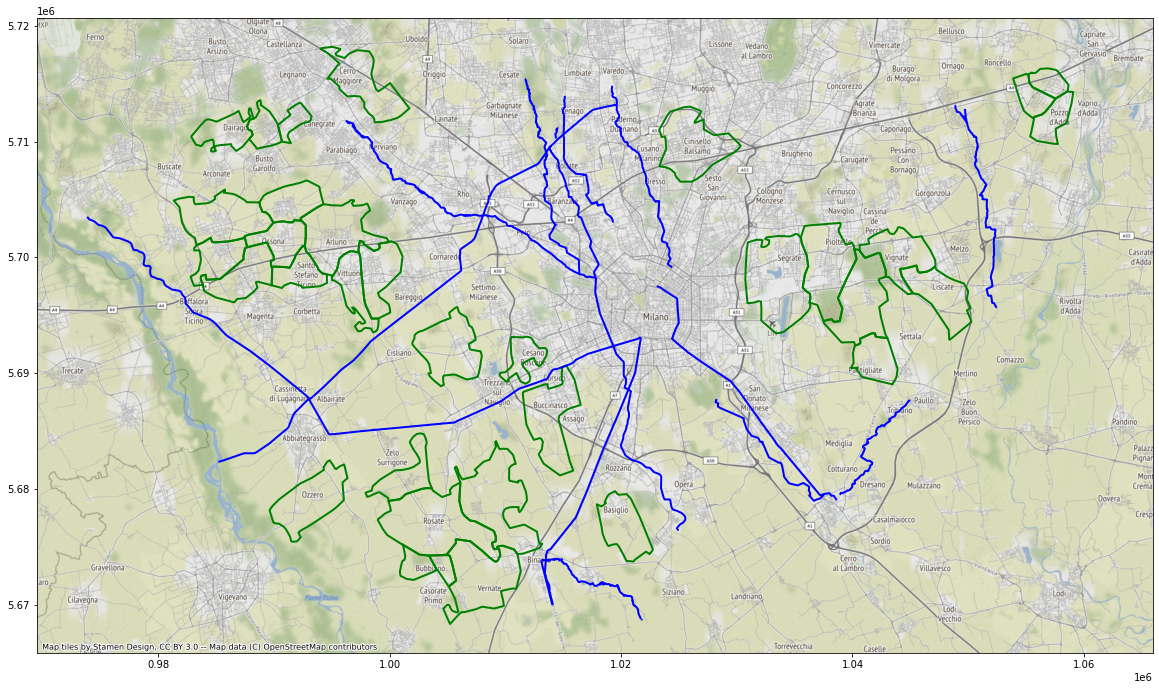

In [41]:
fig, ax = plt.subplots(figsize = (20,20))
comuniNotCrossedCopy.plot(ax=ax, facecolor="none", edgecolor="g",linewidth=2)
Corsi_Acqua_Milano.to_crs(epsg = 3857).plot(ax = ax,linewidth=2, edgecolor = "b" )
contextily.add_basemap(ax=ax)

for idx, row in comuniNotCrossedCopy.iterrows():
   plt.annotate(s=row["COMUNE"], xy=row["coords"], horizontalalignment="center", color="k")  